## Importar librerias

In [494]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## Manuela Lizcano (Analisis de Datos)

Carga de datos

In [495]:
df = pd.read_csv("./datos_apartamentos_rent.csv", sep=";", encoding='latin1')

In [496]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


Perfilamiento de datos

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

Comentarios: Podemos notar que las variables de amenities, bathrooms, bedrooms, pets_allowed, address, cityname, state, latitud y longitude contienen datos sin valor. 

Tamaño de los datos por naturaleza son 10000. 
De todas las variables 4 columnas contienen datos decimales, 4 columnas contienen datos numericos y 14 columnas continen valores categoricos. 

In [498]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


Analisis de variables numericas

Primero vamos a realizar una analisis de las variables numericas las cuales para este conjunto de datos son id, bathrooms, bedrooms, price, square_feet, latitud, longitude, time

In [499]:
variables_num=df.select_dtypes(include=[np.number])
variables_num_list=variables_num.columns.tolist()


In [500]:
filtrado=["price", "id"]
variables_num_list_filtrado=[v for v in variables_num_list if v not in filtrado]
print(variables_num_list_filtrado)

['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'time']


Relación entre características numéricas y objetivo:


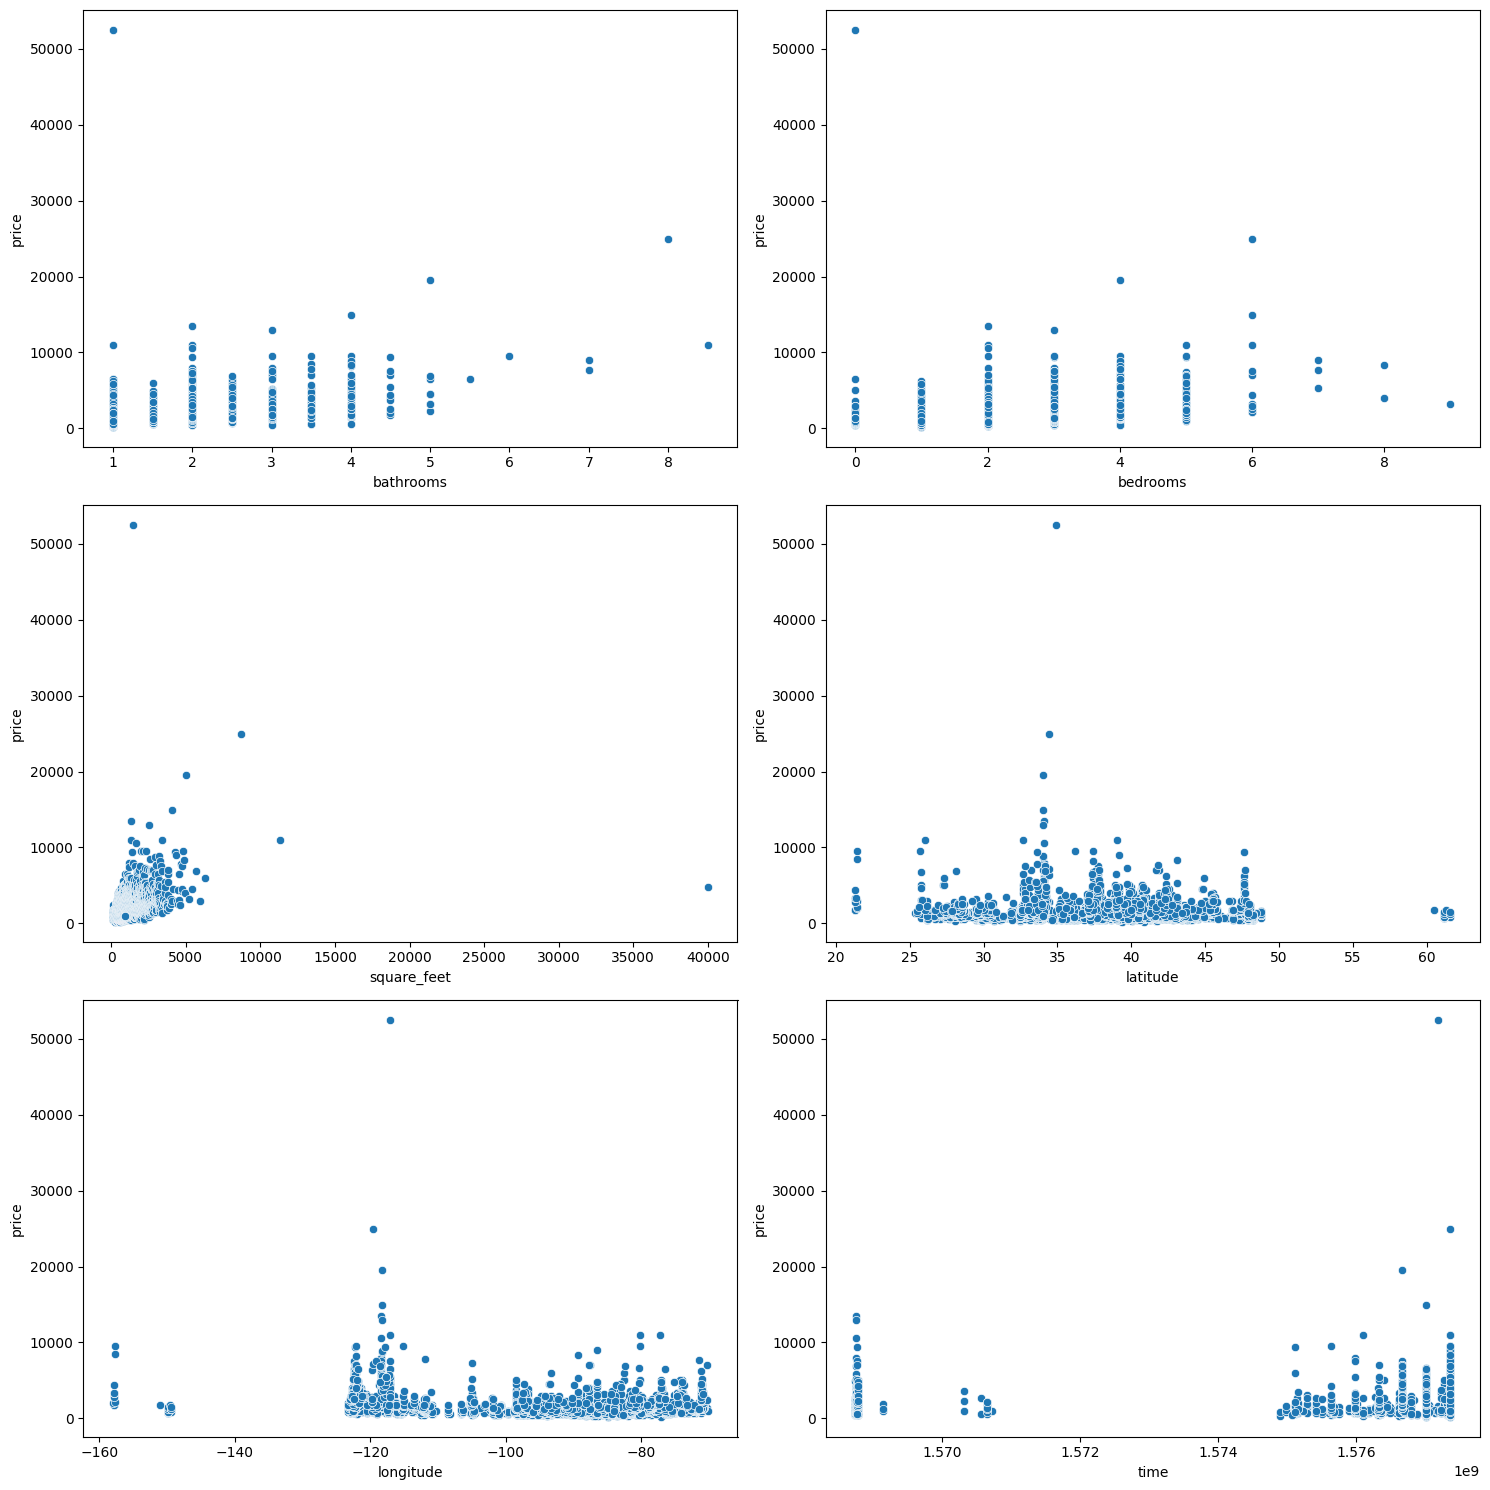

In [501]:
print('Relación entre características numéricas y objetivo:')

graficos_por_fila = 2

fig, axes = plt.subplots(nrows=(len(variables_num_list_filtrado) + graficos_por_fila - 1) // graficos_por_fila,
                         ncols=graficos_por_fila,
                         figsize=(15, 5 * ((len(variables_num_list_filtrado) + graficos_por_fila - 1) // graficos_por_fila)))

axes = axes.flatten()
for i, caracteristica in enumerate(variables_num_list_filtrado):
    sns.scatterplot(data=df, x=caracteristica, y='price', ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [502]:
filtrado=[ "id"]

variables_num_list_filtrado1=[v for v in variables_num_list if v not in filtrado]


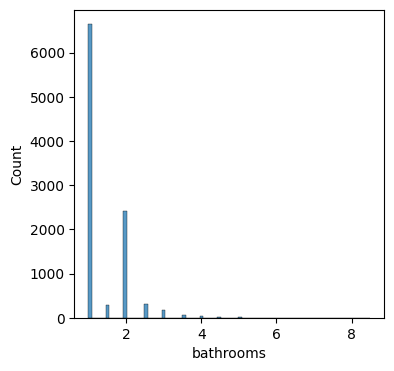

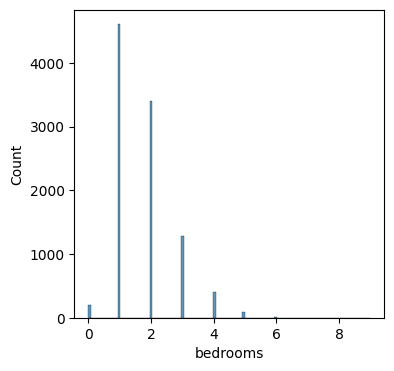

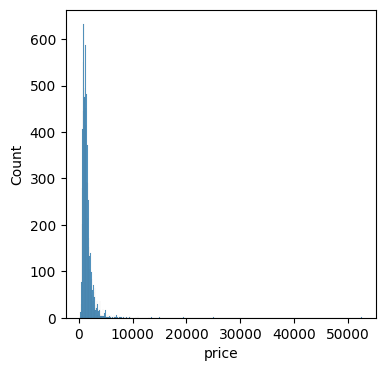

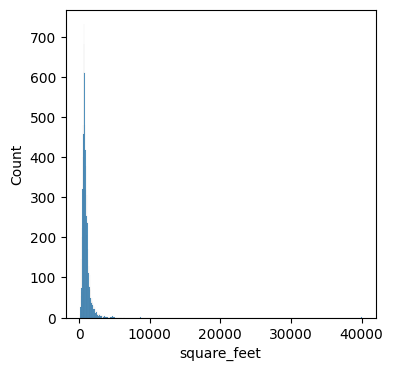

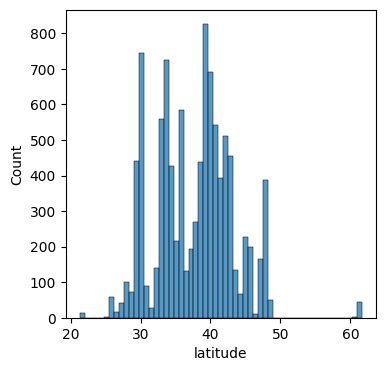

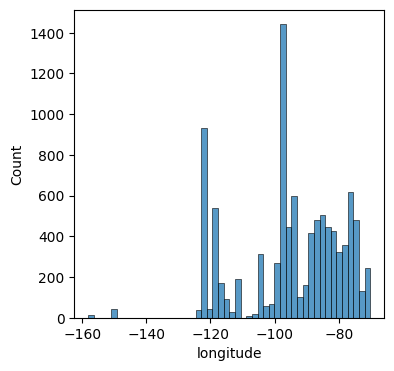

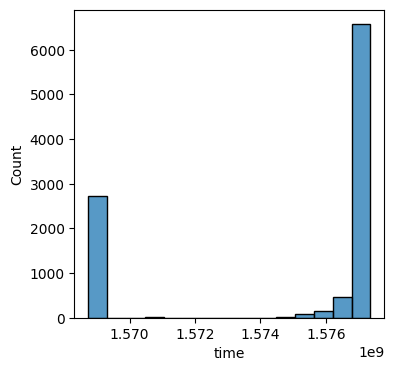

In [503]:
df_hist = df[variables_num_list_filtrado1]
for col in df_hist.columns:
    plt.figure(figsize=(4,4))
    plt.tight_layout()
    sns.histplot(df_hist[col])

De estas graficas podemos ver diferentes relaciones que se presentan en los datos: 
1. Bathrooms: Se puede ver una tendencia de mientras el apartamento cuente con una mayor cantidad de baños, el precio de este aumenta. De igual manera el set de datos contiene un dato anomalo considerando que a pesar de que tiene 1 baño el precio de este apartamento es considerablemente mayor a los demas valores.
2. Beds: De esta variable podemos ver que no hay una relacion muy clara entre el numero de habitaciones de una habitacion con respecto al precio de este inmueble. Para esta variable tambien existe un posible dato anomalo considerando que a pesar de que cuenta con solo una habitacion, este apartamento tiene un precio considerablemente mayor al resto de apartamentos. 
3. Square_feet: Para esta variable se puede ver una clara relaciona entre el precio y el tamaño del apartamento, se puede ver una relacion lineal entre las dos variables. Para esta variable existen dos datos que pueden representar outliers, considerando que para un caso el tamaño del apartamento es muy pequeño para un precio tan alto y de igual manera se presenta un dato de una apartamento bastante grande con un precio considerablemente menor. 
4. Latitud: Se puede ver una alta concentracion de apartamentos entre las longitudes de 25 y 50. Se puede ver que para los apartamentos que se encuentran cerca de 35 el precio es mucho mayor. 
5. Longitud: Se puede ver una alta concentracion de los apartamento entre los longitudes entre -120 y -80. Se puede ver que los apartamentos en la longitud de -120 el precio de mucho mayor con respecto al resto de datos del conjunto. 
6. Time: Se puede ver que la relacion entre el precio de venta del apartamento y hace cuanto tiempo fue creado en anuncio no es tan claro. 

Analisis de variables categoricas

In [504]:
variables_cat=df.select_dtypes(include=[object])
variables_cat_list=variables_cat.columns.tolist()
print(variables_cat_list)

['category', 'title', 'body', 'amenities', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price_display', 'price_type', 'address', 'cityname', 'state', 'source']


In [505]:
for i in variables_cat_list:
    print(df[i].value_counts())
    print("")

category
housing/rent/apartment     9996
housing/rent/home             2
housing/rent/short_term       2
Name: count, dtype: int64

title
Apartment in great location                           40
Super Cute! Apartment for Rent!                       32
Apartment in prime location                           31
This Apartment is a must see!                         27
Apartment in quiet area, spacious with big kitchen    26
                                                      ..
One BR 218 South Walnut                                1
One BR 5505 Bonner Ave.,                               1
One BR 21200 Kittridge St                              1
One BR 807 WEST LYNN                                   1
Beautiful Lawrenceville Apartment for rent             1
Name: count, Length: 9350, dtype: int64

body
When searching for a pet-friendly One-, Two- and 3 Beds apartment homes in Randallstown, look no further than Northwest Crossing. Northwest Crossing's convenient suburban. and Liberty provi

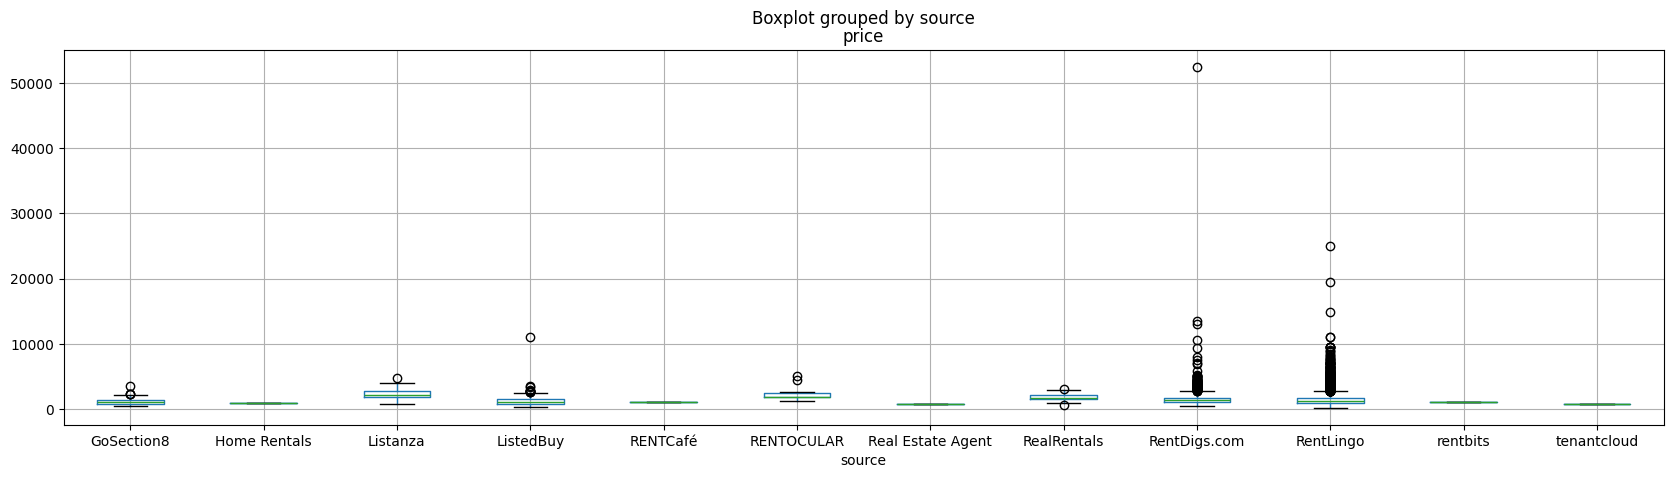

In [506]:
df.boxplot(column='price', by='source', figsize=(20, 5))
plt.show()

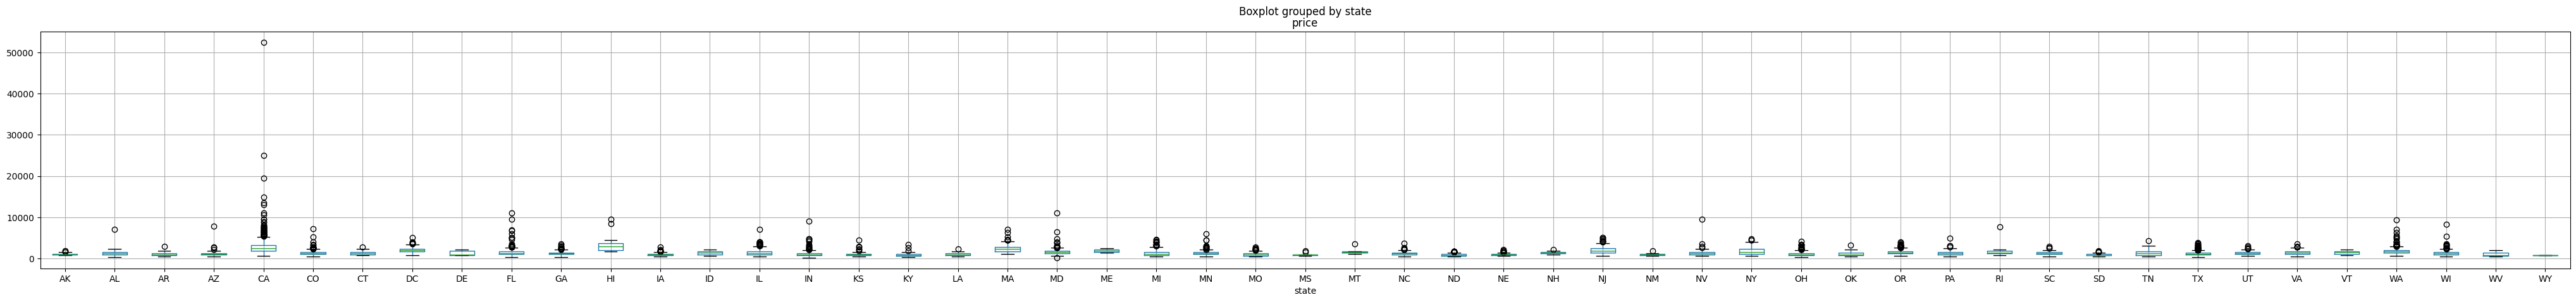

In [507]:
df.boxplot(column='price', by='state', figsize=(50, 5))
plt.show()

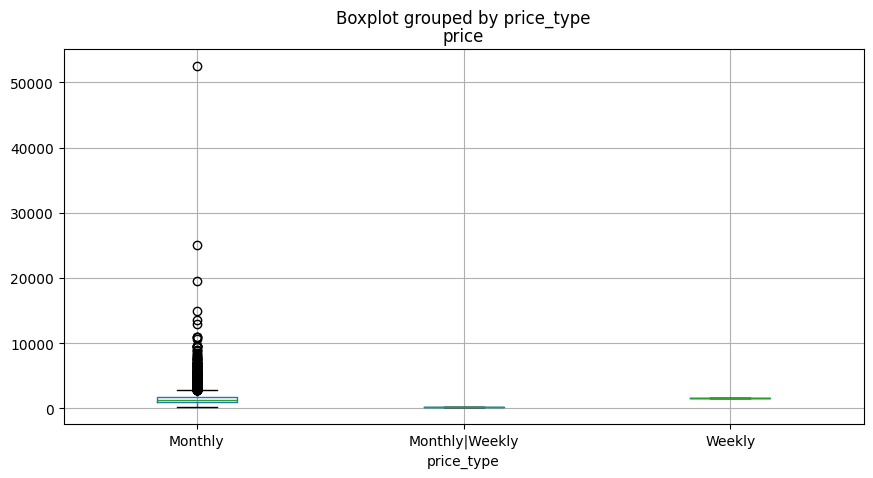

In [508]:
df.boxplot(column='price', by='price_type', figsize=(10, 5))
plt.show()

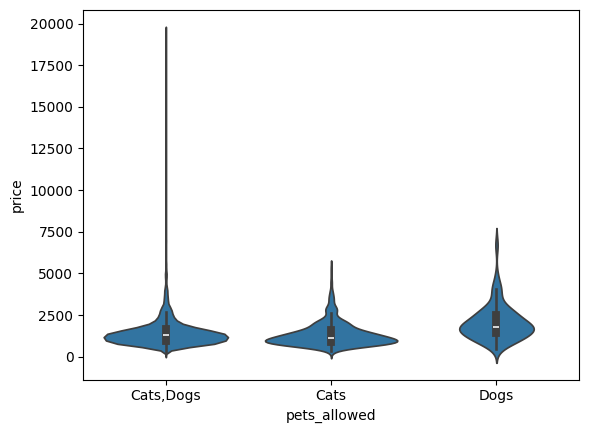

In [509]:
sns.violinplot(data=df, x='pets_allowed', y='price')
plt.show()

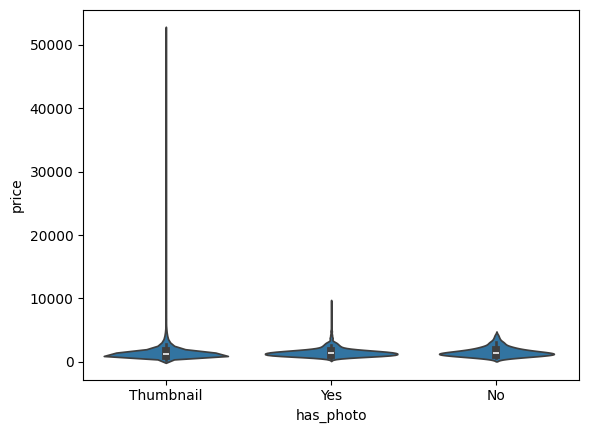

In [510]:
sns.violinplot(data=df, x='has_photo', y='price')
plt.show()

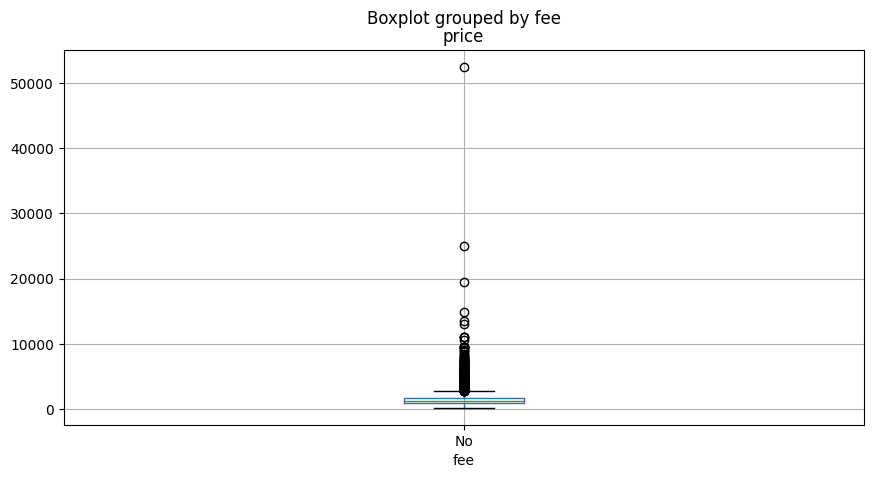

In [511]:
df.boxplot(column='price', by='fee', figsize=(10, 5))
plt.show()

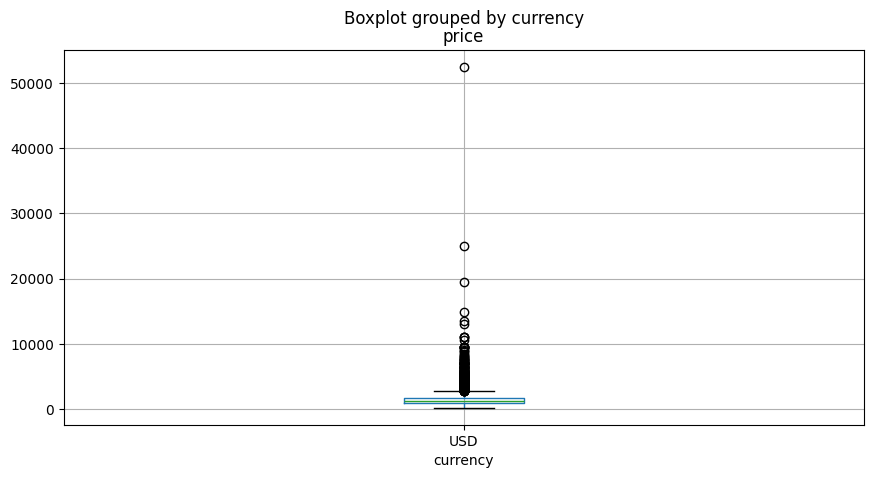

In [512]:
df.boxplot(column='price', by='currency', figsize=(10, 5))
plt.show()

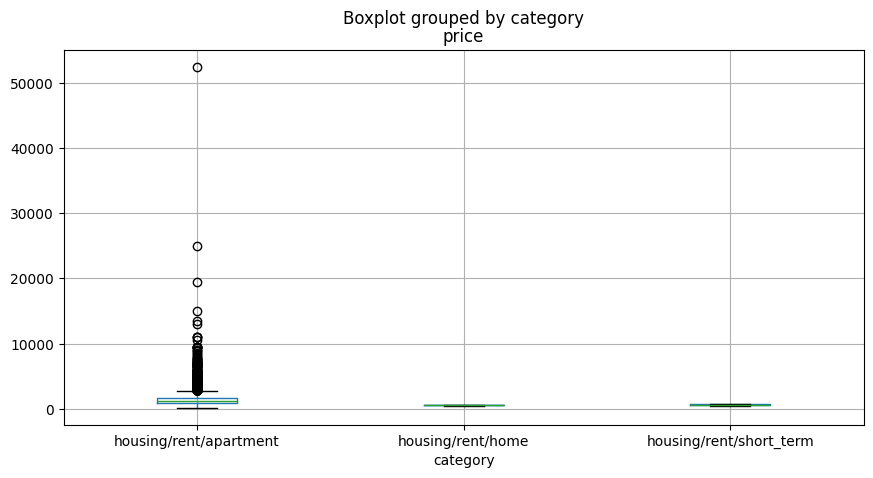

In [513]:
df.boxplot(column='price', by='category', figsize=(10, 5))
plt.show()

## Manuela Lizcano (Ingenieria de datos)

In [514]:
df=df.drop_duplicates()

Se eliminan todos los valores duplicados

In [515]:
lower_bound = df['price'].quantile(0.001)  
upper_bound = df['price'].quantile(0.9999)  
print(lower_bound, upper_bound)


df_filtered = df[(df['price'] <= upper_bound)]

385.983 25002.74999998055


Se dejan unicamente los valores que se encuentran entre los percentiles 5 y 95 de la variable price.

In [516]:

df_filtered.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4162
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

In [517]:
df_filtered = df_filtered.drop("amenities", axis=1)

In [518]:
df_filtered = df_filtered.drop("address", axis=1)

In [519]:
df_filtered = df_filtered.drop("pets_allowed", axis=1)

Considerando la alta proporcion de valores nulos de estas 3 columnas, estas son descartadas

In [520]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   category       9999 non-null   object 
 2   title          9999 non-null   object 
 3   body           9999 non-null   object 
 4   bathrooms      9965 non-null   float64
 5   bedrooms       9992 non-null   float64
 6   currency       9999 non-null   object 
 7   fee            9999 non-null   object 
 8   has_photo      9999 non-null   object 
 9   price          9999 non-null   int64  
 10  price_display  9999 non-null   object 
 11  price_type     9999 non-null   object 
 12  square_feet    9999 non-null   int64  
 13  cityname       9922 non-null   object 
 14  state          9922 non-null   object 
 15  latitude       9989 non-null   float64
 16  longitude      9989 non-null   float64
 17  source         9999 non-null   object 
 18  time         

In [521]:
df_filtered["title"].value_counts()

title
Apartment in great location                           40
Super Cute! Apartment for Rent!                       32
Apartment in prime location                           31
This Apartment is a must see!                         27
Apartment in quiet area, spacious with big kitchen    26
                                                      ..
One BR 218 South Walnut                                1
One BR 5505 Bonner Ave.,                               1
One BR 21200 Kittridge St                              1
One BR 807 WEST LYNN                                   1
Beautiful Lawrenceville Apartment for rent             1
Name: count, Length: 9349, dtype: int64

El texto del articulo que fue usado para la descripccion del apartamento puede ser subjetivo a las opiniones de las personas, no se tiene en cuenta para el modelo. 

In [522]:
df_filtered = df_filtered.drop("title", axis=1)

In [523]:
df_filtered["category"].value_counts()

category
housing/rent/apartment     9995
housing/rent/home             2
housing/rent/short_term       2
Name: count, dtype: int64

Esta variable categorica no nos puede brindar mucha informacion acerca de como afecta la categoria del anuncia para describir el comportamiento del texto considerando que todos los apartamentos se encuentran en la categorica de "housing/rent/apartment" y solo hay un valor con el valor categorico de "housing/rent/short_term". Esto por esta razon que esta variable no se tiene en cuenta para el modelo. 

In [524]:
df_filtered = df_filtered.drop("category", axis=1)

In [525]:
df_filtered["body"].value_counts()

body
When searching for a pet-friendly One-, Two- and 3 Beds apartment homes in Randallstown, look no further than Northwest Crossing. Northwest Crossing's convenient suburban. and Liberty provides you with immediate access to shopping, entertainment, transportation and is directly across from Northwest Hospital. Commuters enjoy easy access to Baltimore's Inner, Baltimore Washington International Airport BWI, Owings Mills, Pikesville, and Catonsville. The Crossing enjoy the comforts of an apartment they are truly proud to with wall-to-wall carpeting, fully-equipped kitchens with dishwashers, over-sized closets and expansive balconies. Outside your home, Northwest Crossing boasts a fitness facilities, basketball and professionally landscaped grounds with picnic areas. Take pleasure in knowing that our professional management team is here to assist you with any need great or small. We are excited to meet you and welcome you home!                                                           

La descripccion de un apartamento no nos da informacion clara acerca del precio. No se tiene en cuenta para el modelo. 

In [526]:
df_filtered = df_filtered.drop("body", axis=1)

In [527]:
df_filtered["currency"].value_counts()

currency
USD    9999
Name: count, dtype: int64

La columna de currency no nos brinda informacion adicional al modelo para lograr identificar el comportamiento del precio, es por esto que no se tiene en cuenta. 

In [528]:
df_filtered = df_filtered.drop("currency", axis=1)

In [529]:
df_filtered["fee"].value_counts()

fee
No    9999
Name: count, dtype: int64

La variable de fee no brinda informacion adicional al modelo considerando que todos los datos de los apartamentos no tienen fee. 

In [530]:
df_filtered = df_filtered.drop("fee", axis=1)

In [531]:
df_filtered["has_photo"].value_counts()

has_photo
Thumbnail    8906
Yes           909
No            184
Name: count, dtype: int64

Al tener tres categorias, vamos a usar variables dummies para convertir esta variable categorica en otras 3 numericas: Thumbnail, Yes. En caso de que ese dato tomara valor de No, ni la columna de Thumnail y Yes a va a tener informacion y esto implica que no tiene foto. 

In [532]:
df_dummies = pd.get_dummies(df_filtered["has_photo"],prefix="has_photo" , drop_first=True)
df_dummies = df_dummies.astype(int)
df_filtered=df_filtered.drop("has_photo", axis=1)
df1=pd.concat([df_filtered,df_dummies], axis=1)

In [533]:
df1["price_display"].value_counts()

price_display
$1,350    86
$1,250    81
$850      79
$1,100    77
$1,400    74
          ..
$1,408     1
$1,667     1
$2,053     1
$813       1
$4,790     1
Name: count, Length: 1725, dtype: int64

La variable de price_display no nos dice informacion adicional de la que ya nos dice la variable price. Esta no se tiene en cuenta para el modelo. 

In [534]:
df1 = df1.drop("price_display", axis=1)

In [535]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9999 non-null   int64  
 1   bathrooms            9965 non-null   float64
 2   bedrooms             9992 non-null   float64
 3   price                9999 non-null   int64  
 4   price_type           9999 non-null   object 
 5   square_feet          9999 non-null   int64  
 6   cityname             9922 non-null   object 
 7   state                9922 non-null   object 
 8   latitude             9989 non-null   float64
 9   longitude            9989 non-null   float64
 10  source               9999 non-null   object 
 11  time                 9999 non-null   int64  
 12  has_photo_Thumbnail  9999 non-null   int64  
 13  has_photo_Yes        9999 non-null   int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 1.1+ MB


In [536]:
df1["price_type"].value_counts()

price_type
Monthly           9997
Weekly               1
Monthly|Weekly       1
Name: count, dtype: int64

La variable de price_type no nos va a brindar información adicional al modelo considerando que todos los datos tienen pagos mensuales con excepcion a una dato donde el pago se realiza semanal. Al no ser util parar el modelo, esta variable no se tiene en cuenta. 

In [537]:
df1 = df1.drop("price_type", axis=1)

Con el objetivo de lograr analizar la relacion entre el precio con las variables de ciudad, estado y fuente de donde proviene la informacion, se va a realizar one-hot encoding, esto con el objetivo de tener datos numericos. 

In [538]:
encoder=LabelEncoder()

In [539]:
data_ciudad=df1["cityname"]
encoded_vals_ciudad= encoder.fit_transform(data_ciudad)
df_encoded_ciudad=pd.DataFrame(encoded_vals_ciudad, columns=["cityname_num"])
#df1=df1.drop("cityname", axis=1)
df1=pd.concat([df1,df_encoded_ciudad], axis=1)


In [540]:
data_estado=df1["state"]
encoded_vals_estado= encoder.fit_transform(data_estado)
df_encoded_estado=pd.DataFrame(encoded_vals_estado, columns=["state_num"])
#df1=df1.drop("state", axis=1)
df1=pd.concat([df1,df_encoded_estado], axis=1)

In [541]:
data_fuente=df1["source"]
encoded_vals_fuente= encoder.fit_transform(data_fuente)
df_encoded_fuente=pd.DataFrame(encoded_vals_fuente, columns=["source"])
df1=df1.drop("source", axis=1)
df1=pd.concat([df1,df_encoded_fuente], axis=1)

In [542]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 8829
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9999 non-null   float64
 1   bathrooms            9965 non-null   float64
 2   bedrooms             9992 non-null   float64
 3   price                9999 non-null   float64
 4   square_feet          9999 non-null   float64
 5   cityname             9922 non-null   object 
 6   state                9922 non-null   object 
 7   latitude             9989 non-null   float64
 8   longitude            9989 non-null   float64
 9   time                 9999 non-null   float64
 10  has_photo_Thumbnail  9999 non-null   float64
 11  has_photo_Yes        9999 non-null   float64
 12  cityname_num         9999 non-null   float64
 13  state_num            10000 non-null  int64  
 14  source               10000 non-null  int64  
dtypes: float64(11), int64(2), object(2)
memory

Considerando que todos los datos son numericos ahora si podemos realizar el analisis de correlaciones

In [543]:
#df1 = df1.drop("id", axis=1)

Para realizar el modelo no se tiene que tener en cuenta el codigo del id

Matriz de correlaciones

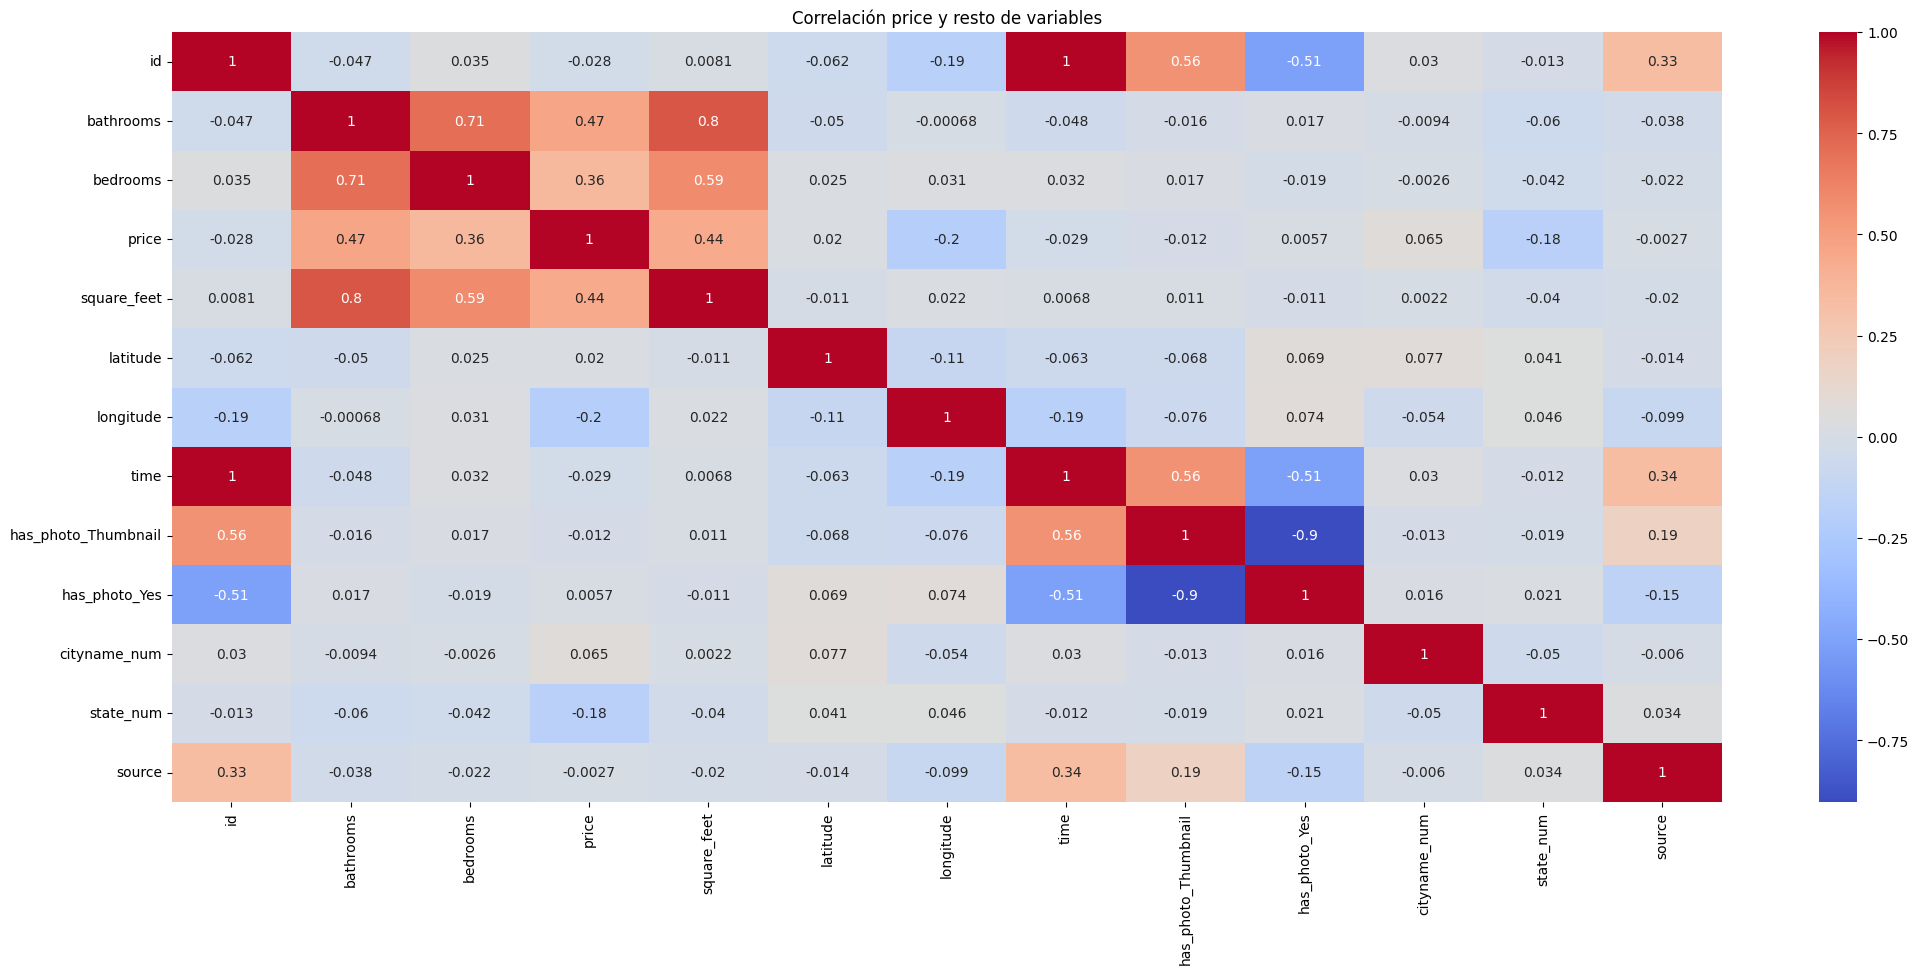

In [544]:
plt.figure(figsize=(25, 10))
sns.heatmap(df1.drop(['state', 'cityname'], axis=1).corr(), annot=True, cmap='coolwarm')

plt.title('Correlación price y resto de variables')
plt.show()

Con esta matriz de correlaciones podemos ver que las variables de has_photo_Yes y has_photo_Thumnail tiene una relacion bastante alta, es por esto que se decide dejar solo la variable de has_photo Thumbnail. 

De esta matriz de correlacion tambien podemos ver que la variable de square feet tiene una alta correlacion con las variables de bedrooms y bathrooms, sin embargo es importante tener en cuenta que una alta correlacion no implica causacion entre las variales, por esto se decide dejar las tres variables, teniendo en cuenta que para el objetivo del ejercicio, estas variables son necesarias. 

In [545]:
df1.head()

,id,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,time,has_photo_Thumbnail,has_photo_Yes,cityname_num,state_num,source
0,5.668627e+09,NaN,0.0,790.0,101.0,Washington,DC,38.9057,-76.9861,1.577359e+09,1.0,0.0,1467.0,7,9
1,5.664597e+09,NaN,1.0,425.0,106.0,Evansville,IN,37.9680,-87.6621,1.577017e+09,1.0,0.0,448.0,15,9
2,5.668627e+09,1.0,0.0,1390.0,107.0,Arlington,VA,38.8910,-77.0816,1.577359e+09,1.0,0.0,52.0,45,9
3,5.659918e+09,1.0,0.0,925.0,116.0,Seattle,WA,47.6160,-122.3275,1.576668e+09,1.0,0.0,1284.0,47,9
4,5.668627e+09,NaN,0.0,880.0,125.0,Arlington,VA,38.8738,-77.1055,1.577359e+09,1.0,0.0,52.0,45,9


In [546]:
df1 = df1.drop("has_photo_Yes", axis=1)

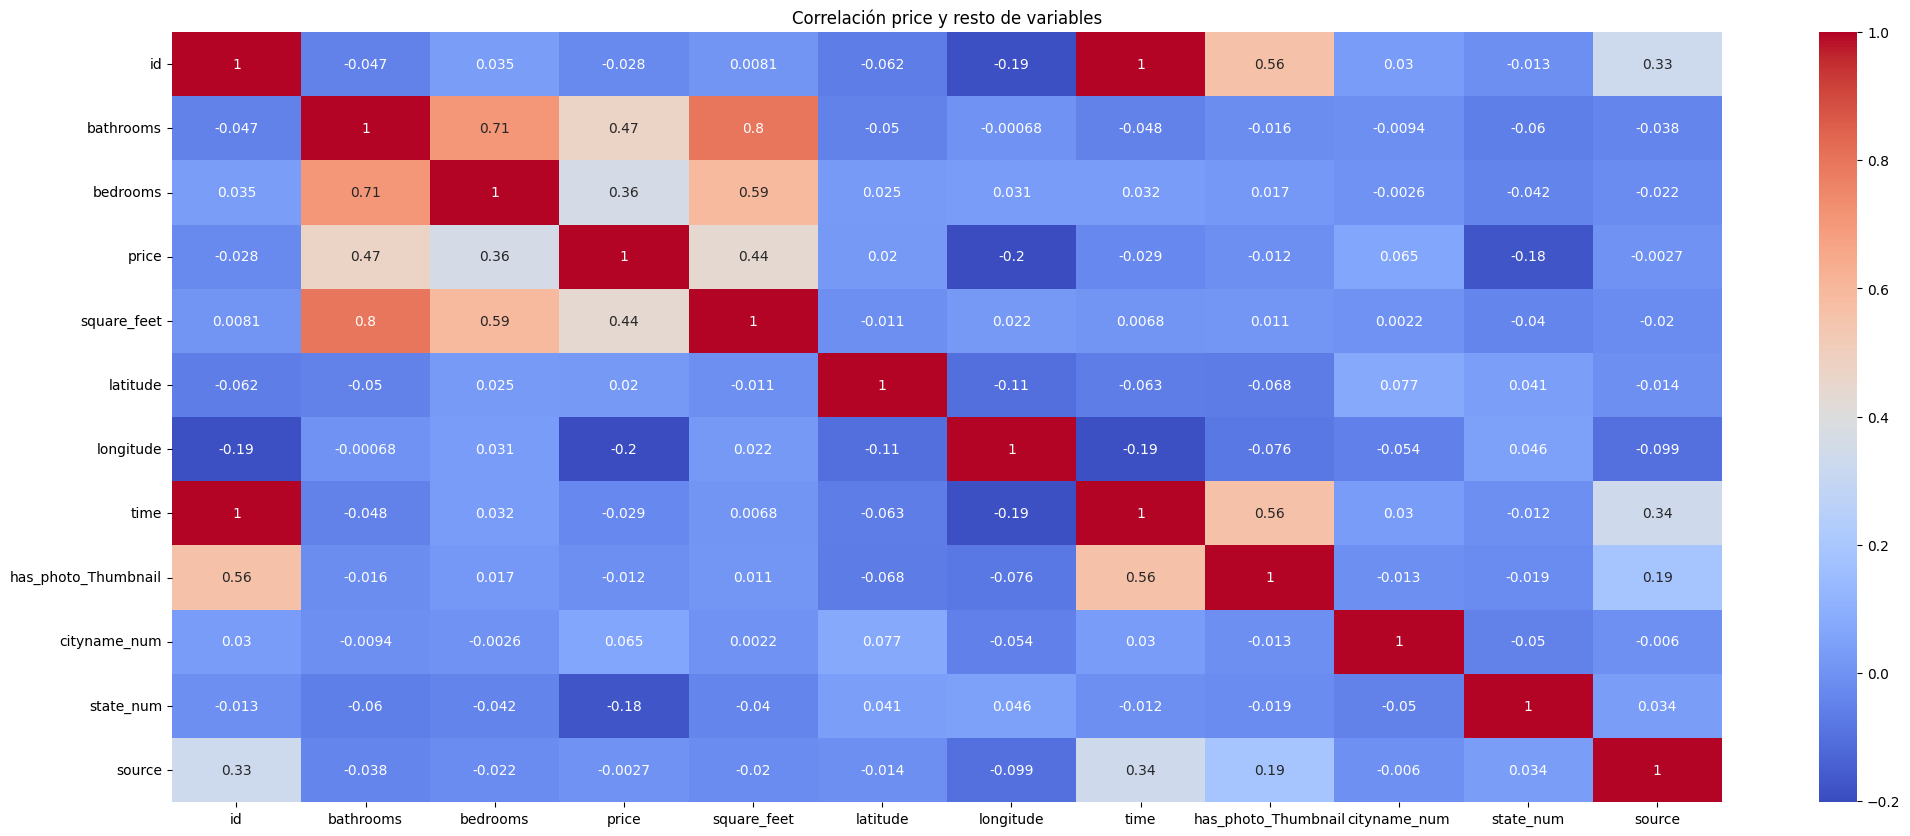

In [547]:
plt.figure(figsize=(25, 10))
sns.heatmap(df1.drop(['state', 'cityname'], axis=1).corr(), annot=True, cmap='coolwarm')

plt.title('Correlación price y resto de variables')
plt.show()

In [548]:
df1=df1.dropna()

In [549]:
df1["bathrooms"]=np.floor(df1["bathrooms"]).astype(int)

In [550]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9881 entries, 2 to 9997
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9881 non-null   float64
 1   bathrooms            9881 non-null   int64  
 2   bedrooms             9881 non-null   float64
 3   price                9881 non-null   float64
 4   square_feet          9881 non-null   float64
 5   cityname             9881 non-null   object 
 6   state                9881 non-null   object 
 7   latitude             9881 non-null   float64
 8   longitude            9881 non-null   float64
 9   time                 9881 non-null   float64
 10  has_photo_Thumbnail  9881 non-null   float64
 11  cityname_num         9881 non-null   float64
 12  state_num            9881 non-null   int64  
 13  source               9881 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.1+ MB


Relación entre características numéricas y objetivo:


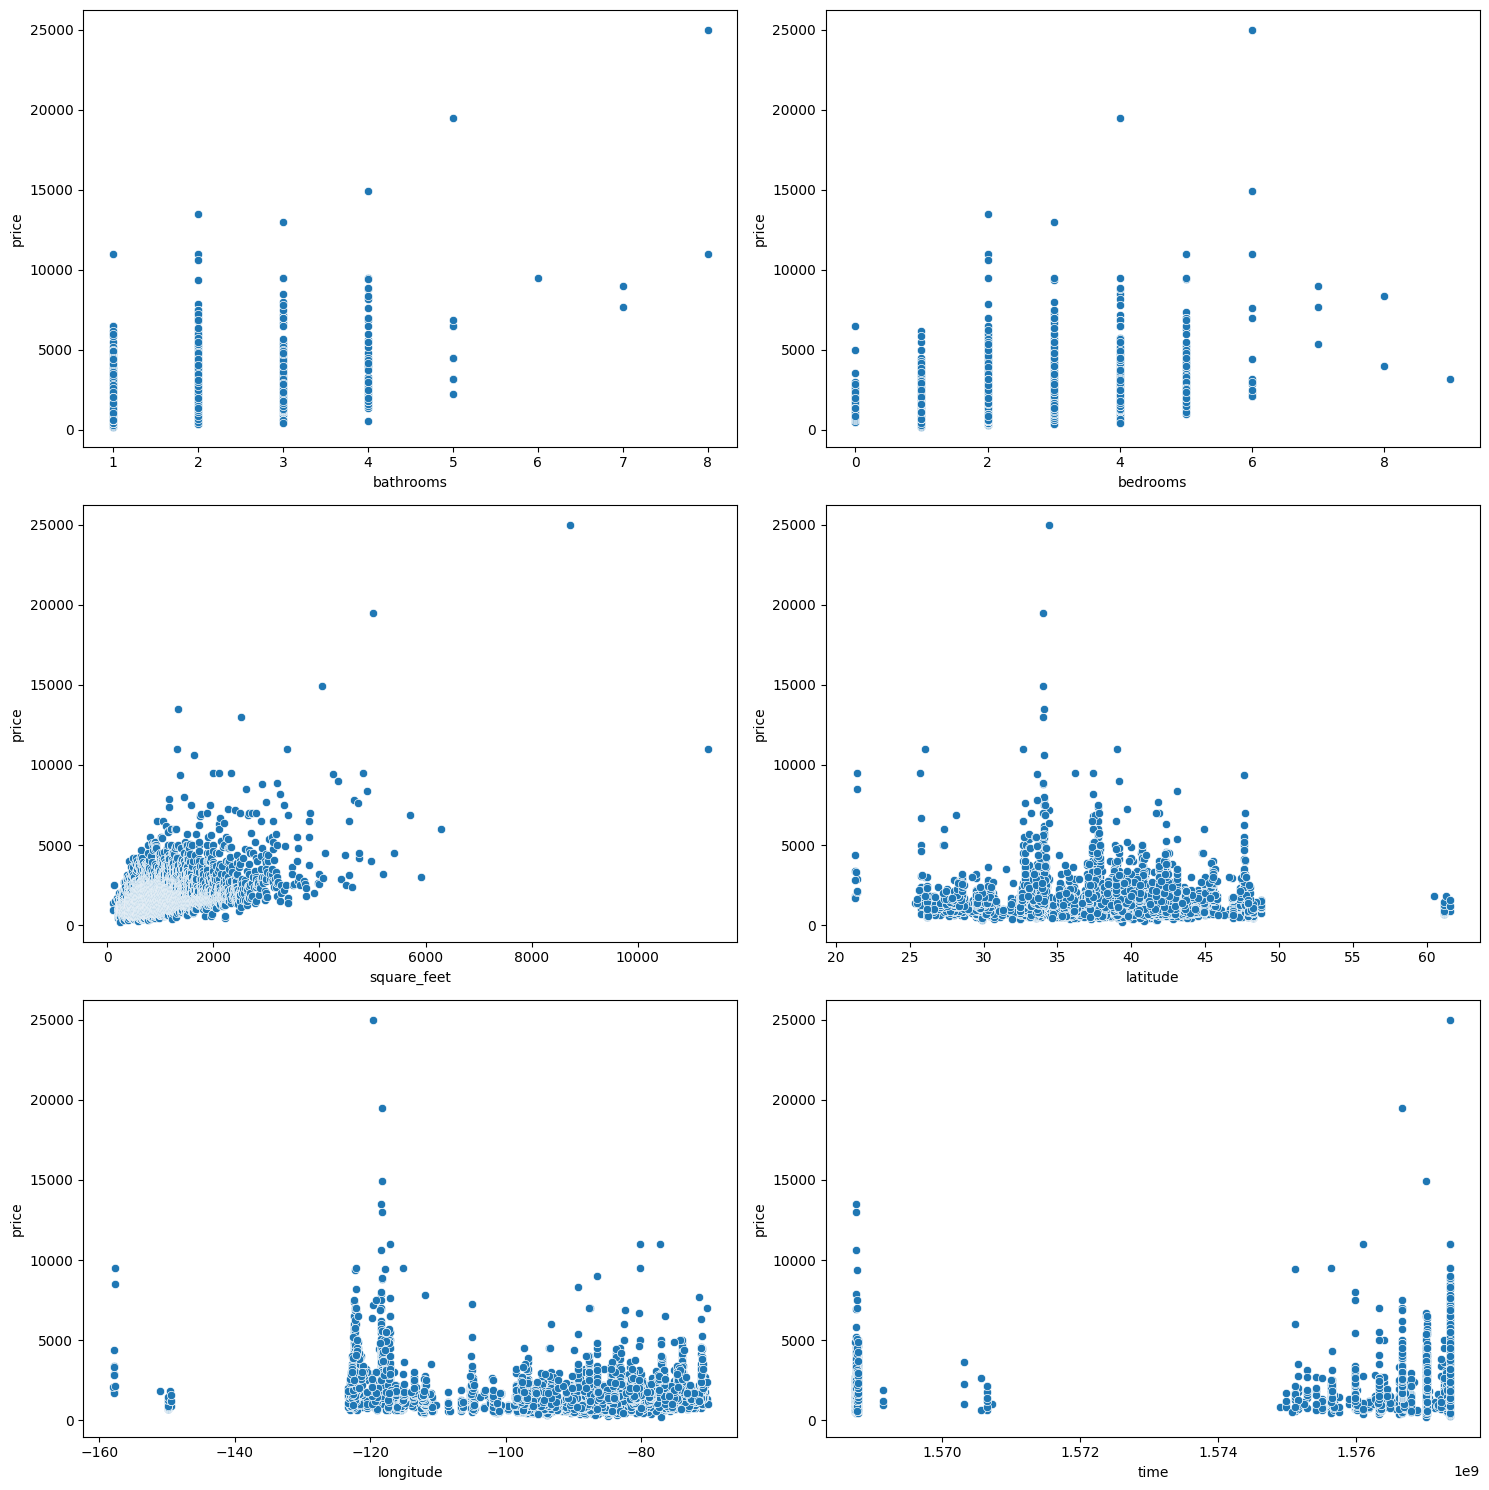

In [551]:
print('Relación entre características numéricas y objetivo:')

graficos_por_fila = 2

fig, axes = plt.subplots(nrows=(len(variables_num_list_filtrado) + graficos_por_fila - 1) // graficos_por_fila,
                         ncols=graficos_por_fila,
                         figsize=(15, 5 * ((len(variables_num_list_filtrado) + graficos_por_fila - 1) // graficos_por_fila)))

axes = axes.flatten()
for i, caracteristica in enumerate(variables_num_list_filtrado):
    sns.scatterplot(data=df1, x=caracteristica, y='price', ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [552]:
#quitar time y has_photo_thumbnail
"""df1 = df1.drop("time", axis=1)"""
"""df1 = df1.drop("has_photo_Thumbnail", axis=1)"""
"""df1 = df1.drop("source", axis=1)"""



'df1 = df1.drop("source", axis=1)'

In [553]:
df1.head()

,id,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,time,has_photo_Thumbnail,cityname_num,state_num,source
2,5.668627e+09,1,0.0,1390.0,107.0,Arlington,VA,38.8910,-77.0816,1.577359e+09,1.0,52.0,45,9
3,5.659918e+09,1,0.0,925.0,116.0,Seattle,WA,47.6160,-122.3275,1.576668e+09,1.0,1284.0,47,9
5,5.667892e+09,1,0.0,2475.0,130.0,Manhattan,NY,40.7629,-73.9885,1.577290e+09,1.0,820.0,34,2
8,5.668610e+09,1,0.0,1495.0,138.0,San Francisco,CA,37.7599,-122.4379,1.577358e+09,1.0,1246.0,4,9
14,5.664572e+09,1,0.0,1695.0,190.0,San Francisco,CA,37.7599,-122.4379,1.577015e+09,1.0,1246.0,4,9


## Ciencia de datos - Modelamiento (Juan Diego )

#### Modelo de regresión lineal

In [554]:
exportar = df1.copy()

In [555]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

id_column = df1['id']
df1 = df1.drop('id', axis=1)

cityname_column = df1['cityname']
df1 = df1.drop('cityname', axis=1)

state_column = df1['state']
df1 = df1.drop('state', axis=1)

X = df1.drop("price", axis=1)
y = df1["price"].values.reshape(-1, 1)  

#Escalar X e y por separado
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

#Volver a unir el ID, cityname y state
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['id'] = id_column.values
X_scaled_df['cityname'] = cityname_column.values
X_scaled_df['state'] = state_column.values


X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_scaled, test_size=0.3, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train.drop(["id", "cityname", "state"], axis=1), y_train)

#Predicciones
y_pred_scaled = model_1.predict(X_test.drop(["id", "cityname", "state"], axis=1))

# 🚀 Desescalar predicciones y valores reales
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)



# Evaluar el modelo con los valores escalador
mse = mean_squared_error(y_test, y_pred_scaled)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.66
Mean Absolute Error (MAE): 0.50
R² Score: 0.35


#### Modelo de árbol de decisión

In [556]:
from sklearn.tree import DecisionTreeRegressor

model_2 = DecisionTreeRegressor(max_depth=10)
model_2.fit(X_train.drop(["id", "cityname", "state"], axis=1), y_train)
y_pred = model_2.predict(X_test.drop(["id", "cityname", "state"], axis=1))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Squared Error (MSE): 0.45
Mean Absolute Error (MAE): 0.35
R² Score: 0.56


#### Modelo Gradient boosting 

In [557]:
from sklearn.ensemble import GradientBoostingRegressor

model_3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42, loss='absolute_error')
model_3.fit(X_train.drop(["id", "cityname", "state"], axis=1), y_train)
y_pred = model_3.predict(X_test.drop(["id", "cityname", "state"], axis=1))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


/Users/juanl/opt/anaconda3/envs/py39bi/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Mean Squared Error (MSE): 0.69
Mean Absolute Error (MAE): 0.39
R² Score: 0.33


#### Modelo de random Forest

In [ ]:
""" from sklearn.ensemble import RandomForestRegressor

model_4 = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
#escalar los datos 
model_4.fit(X_train.drop(["id", "cityname", "state"], axis=1), y_train)
y_pred = model_4.predict(X_test.drop(["id", "cityname", "state"], axis=1))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
 """


/Users/juanl/opt/anaconda3/envs/py39bi/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 0.30
Mean Absolute Error (MAE): 0.27
R² Score: 0.71


In [564]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_4_1 = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
model_4_1.fit(X_train.drop(["id", "cityname", "state"], axis=1), y_train)

y_pred_scaled = model_4_1.predict(X_test.drop(["id", "cityname", "state"], axis=1))

y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

X_test_original = scaler_X.inverse_transform(X_test.drop(["id", "cityname", "state"], axis=1))
X_test_original_df = pd.DataFrame(X_test_original, columns=X.columns)
X_test_original_df['id'] = X_test['id'].values
X_test_original_df['real_price'] = y_test_original.flatten()
X_test_original_df['predicted_price'] = y_pred_original.flatten()

#volver a unir el ID, cityname y state
X_test_original_df['cityname'] = X_test['cityname'].values
X_test_original_df['state'] = X_test['state'].values


X_test_original_df.to_csv('x_test.csv', index=False)


#evaluar con los datos escalados
mse = mean_squared_error(y_test, y_pred_scaled)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


/Users/juanl/opt/anaconda3/envs/py39bi/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 0.30
Mean Absolute Error (MAE): 0.27
R² Score: 0.71


In [562]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(["id", "cityname", "state"], axis=1))
X_test_scaled = scaler.transform(X_test.drop(["id", "cityname", "state"], axis=1))

model_6 = Lasso(alpha=0.1)  
model_6.fit(X_train_scaled, y_train)

y_pred = model_6.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7️⃣ Mostrar resultados
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print("Coeficientes del modelo:")



Mean Squared Error (MSE): 0.71
Mean Absolute Error (MAE): 0.51
R² Score: 0.31
Coeficientes del modelo:


In [563]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(["id", "cityname", "state"], axis=1))
X_test_scaled = scaler.transform(X_test.drop(["id", "cityname", "state"], axis=1))

# Optimización: Ajustar hiperparámetros
model_4 = RandomForestRegressor(
    n_estimators=100,  
    max_depth=15, 
    min_samples_split=5, 
    min_samples_leaf=2,  
    random_state=42
)

# Entrenar el modelo
model_4.fit(X_train_scaled, y_train)
y_pred = model_4.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")



/Users/juanl/opt/anaconda3/envs/py39bi/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 0.32
Mean Absolute Error (MAE): 0.27
R² Score: 0.69


In [ ]:
df1.head() 

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,has_photo_Thumbnail,cityname,state,source
2,1,0.0,1390.0,107.0,38.8910,-77.0816,1.577359e+09,1.0,52.0,45,9
3,1,0.0,925.0,116.0,47.6160,-122.3275,1.576668e+09,1.0,1284.0,47,9
5,1,0.0,2475.0,130.0,40.7629,-73.9885,1.577290e+09,1.0,820.0,34,2
8,1,0.0,1495.0,138.0,37.7599,-122.4379,1.577358e+09,1.0,1246.0,4,9
14,1,0.0,1695.0,190.0,37.7599,-122.4379,1.577015e+09,1.0,1246.0,4,9


In [ ]:
#exportar x_test con los precios
x_test = X_test.copy()
x_test["price"] = y_test
x_test["price_predicted"] = y_pred
x_test.to_csv('x_test.csv', index=False)

